In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import torch as t
import torch.nn as nn
import torch.optim as optim
import sklearn.model_selection as sk
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
df = pd.read_csv("/Users/bhara-zstch1566/Deep Learning/Projects/SEP-WEEK-1/Deep learning final projects/Employee Stay/dataset/HR-Employee-Attrition.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df["Attrition"]=df["Attrition"].map({"Yes":1,"No":0})
pd.unique(df["Attrition"])

array([1, 0])

In [5]:
pd.unique(df["BusinessTravel"])
df["BusinessTravel"]=df["BusinessTravel"].map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})

In [6]:
lis=[]
for i in df:
    if (df[i].dtype)!=np.int64:
        lis.append(i)
lis

['Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [7]:
dic={}
for i in lis:
    dic[i]=pd.unique(df[i])
dic


{'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'JobRole': array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources'],
       dtype=object),
 'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
 'Over18': array(['Y'], dtype=object),
 'OverTime': array(['Yes', 'No'], dtype=object)}

In [8]:
df["Department"]=df["Department"].map({'Sales':1, 'Research & Development':2, 'Human Resources':3})
df["EducationField"]=df["EducationField"].map({'Life Sciences':1, 'Other':2, 'Medical':3, 'Marketing':5,'Technical Degree':6, 'Human Resources':7})
df["Gender"]=df["Gender"].map({"Male":1,"Female":2})
df["JobRole"]=df["JobRole"].map({'Sales Executive':1, 'Research Scientist':2, 'Laboratory Technician':3,'Manufacturing Director':4, 'Healthcare Representative':5, 'Manager':6,'Sales Representative':7, 'Research Director':8, 'Human Resources':9})
df["MaritalStatus"]=df["MaritalStatus"].map({'Single':1, 'Married':2, 'Divorced':3})
df["Over18"]=df["Over18"].map({'Y':1})
df["OverTime"]=df["OverTime"].map({"Yes":1,"No":0})

In [9]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,2,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,2,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,2,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,2,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,1,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [10]:
lis=set()
for i in df:
    lis.add(df[i].dtype)
lis

{dtype('int64')}

In [11]:
Y=df["Attrition"].to_numpy(dtype=np.float32)

In [12]:
Y

array([1., 0., 1., ..., 0., 0., 0.], shape=(1470,), dtype=float32)

In [13]:
df=df.drop("Attrition",axis=1)

In [14]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,2,279,2,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,2,2,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,2,1392,2,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,1,591,2,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,2,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,613,2,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,155,2,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,2,1023,1,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [15]:
X=df.to_numpy(dtype=np.float32)

In [16]:

scaler = StandardScaler() 
X = scaler.fit_transform(X)
X

array([[ 0.4463504 , -0.16239917,  0.74252653, ..., -0.0632959 ,
        -0.6791457 ,  0.245834  ],
       [ 1.3223653 ,  1.7173394 , -1.2977746 , ...,  0.76499766,
        -0.3687153 ,  0.80654144],
       [ 0.008343  , -0.16239917,  1.4143633 , ..., -1.1676873 ,
        -0.6791457 , -1.1559347 ],
       ...,
       [-1.0866754 , -0.16239917, -1.6051832 , ..., -0.61549157,
        -0.6791457 , -0.3148735 ],
       [ 1.3223653 ,  1.7173394 ,  0.5466775 , ...,  0.48889977,
        -0.6791457 ,  1.0868952 ],
       [-0.32016256, -0.16239917, -0.43256792, ..., -0.33939376,
        -0.3687153 , -0.59522724]], shape=(1470, 34), dtype=float32)

In [17]:
X

array([[ 0.4463504 , -0.16239917,  0.74252653, ..., -0.0632959 ,
        -0.6791457 ,  0.245834  ],
       [ 1.3223653 ,  1.7173394 , -1.2977746 , ...,  0.76499766,
        -0.3687153 ,  0.80654144],
       [ 0.008343  , -0.16239917,  1.4143633 , ..., -1.1676873 ,
        -0.6791457 , -1.1559347 ],
       ...,
       [-1.0866754 , -0.16239917, -1.6051832 , ..., -0.61549157,
        -0.6791457 , -0.3148735 ],
       [ 1.3223653 ,  1.7173394 ,  0.5466775 , ...,  0.48889977,
        -0.6791457 ,  1.0868952 ],
       [-0.32016256, -0.16239917, -0.43256792, ..., -0.33939376,
        -0.3687153 , -0.59522724]], shape=(1470, 34), dtype=float32)

In [18]:
Y=Y.reshape(-1,1)

In [19]:
X=t.from_numpy(X)
Y=t.from_numpy(Y)

#### TRAIN/DEV/TEST SPLIT

In [20]:
X_train,X_test,Y_train,Y_test=sk.train_test_split(X,Y,test_size=0.3,random_state=42)

In [21]:
X_test,X_dev,Y_test,Y_dev=sk.train_test_split(X_test,Y_test,test_size=0.5,random_state=42)

### Model training

In [22]:
class Neural(nn.Module):
    def __init__(self,input_size):
        super(Neural,self).__init__()
        self.net=nn.Sequential(
            nn.Linear(input_size,64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(8,4),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(4,1)
        )
    
    def forward(self,X):
        return self.net(X)

In [40]:
model = Neural(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
print(X_train.shape[1])

34


In [41]:
X_train.dtype

torch.float32

In [42]:
epochs=1000
cost=[]
for epoch in range(epochs):
    y_pred=model(X_train)
    loss=criterion(y_pred,Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%10==0:
        with t.no_grad():
            y_dev_pred = model(X_dev)
            y_dev_class = (t.sigmoid(y_dev_pred) >= 0.5).float()
            dev_acc = (y_dev_class.eq(Y_dev).sum().item() / Y_dev.shape[0]) * 100
            
            y_train_class = (t.sigmoid(y_pred) >= 0.5).float()
            train_acc = (y_train_class.eq(Y_train).sum().item() / Y_train.shape[0]) * 100
            cost.append(loss.item())
        print(f"Epoch {epoch+1}: loss: {loss.item():.4f} Train Acc: {train_acc:.2f}% | Dev Acc: {dev_acc:.2f}%")

Epoch 10: loss: 0.5371 Train Acc: 82.90% | Dev Acc: 86.88%
Epoch 20: loss: 0.4463 Train Acc: 82.80% | Dev Acc: 86.88%
Epoch 30: loss: 0.3970 Train Acc: 82.90% | Dev Acc: 86.88%
Epoch 40: loss: 0.3621 Train Acc: 82.90% | Dev Acc: 86.88%
Epoch 50: loss: 0.3076 Train Acc: 82.90% | Dev Acc: 86.88%
Epoch 60: loss: 0.2805 Train Acc: 82.90% | Dev Acc: 86.88%
Epoch 70: loss: 0.2643 Train Acc: 82.90% | Dev Acc: 86.88%
Epoch 80: loss: 0.2619 Train Acc: 82.90% | Dev Acc: 86.88%
Epoch 90: loss: 0.2507 Train Acc: 82.90% | Dev Acc: 86.88%
Epoch 100: loss: 0.2382 Train Acc: 90.18% | Dev Acc: 82.35%
Epoch 110: loss: 0.2135 Train Acc: 90.38% | Dev Acc: 84.16%
Epoch 120: loss: 0.1984 Train Acc: 90.86% | Dev Acc: 85.07%
Epoch 130: loss: 0.1996 Train Acc: 91.25% | Dev Acc: 81.45%
Epoch 140: loss: 0.1980 Train Acc: 91.16% | Dev Acc: 81.90%
Epoch 150: loss: 0.1731 Train Acc: 92.03% | Dev Acc: 82.35%
Epoch 160: loss: 0.1538 Train Acc: 92.91% | Dev Acc: 85.52%
Epoch 170: loss: 0.1479 Train Acc: 92.91% | Dev A

In [43]:
with t.no_grad():
    y_test_pred = model(X_test)
    y_test_class= (t.sigmoid(y_test_pred) >= 0.5).float()
    test_acc = (y_test_class.eq(Y_test).sum().item() / Y_test.shape[0]) * 100
print(f"Epoch {epoch+1}: loss: {loss.item():.4f} Train Acc: {train_acc:.2f}% | Dev Acc: {dev_acc:.2f}% | Test Acc: {test_acc:.2f}%")    

Epoch 1000: loss: 0.0953 Train Acc: 94.07% | Dev Acc: 86.43% | Test Acc: 85.91%


# With Adam Optimizer

____

## Without any Regularaization.

<Axes: >

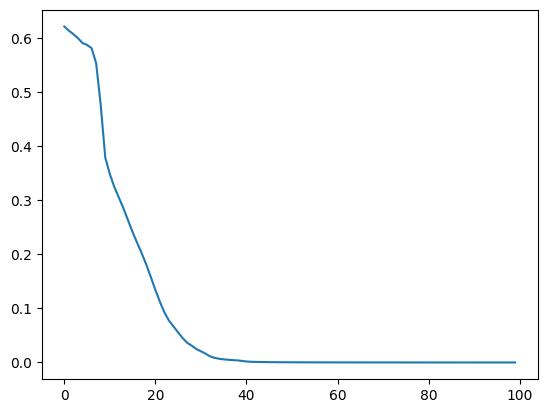

**Epoch 1000: loss: 0.0000 Train Acc: 100.00% | Dev Acc: 84.62% | Test Acc: 83.64%**

#### Accuracy : 83.64%

***Without any Regularaization.***


____

## With dropout Regularaization. 

<Axes: >

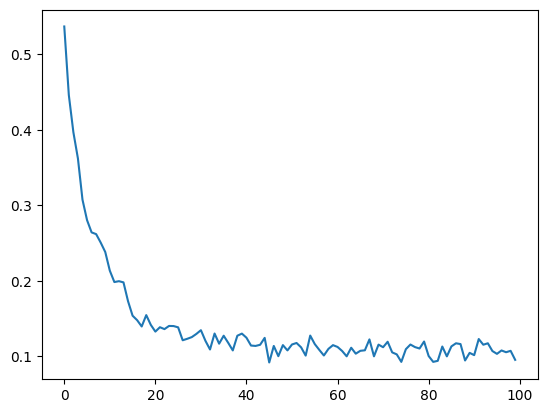

In [44]:
sns.lineplot(cost)

**Epoch 1000: loss: 0.1232 Train Acc: 96.99% | Dev Acc: 81.90% | Test Acc: 87.27%**

#### Accuracy : 87.27%

***with dropout regularaization. Dropout(0.3), each layer of nn***


_______________

## With dropout Regularaization and L2 Regularaization.

<Axes: >

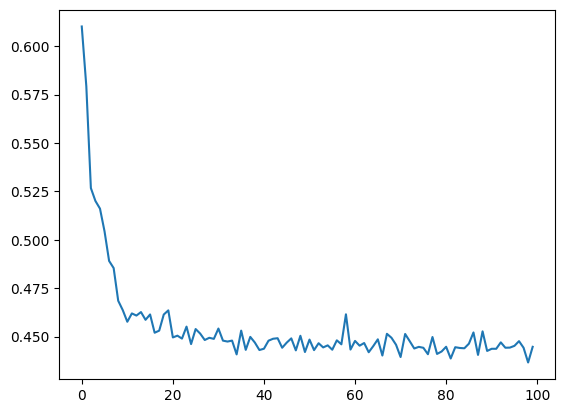

In [93]:
sns.lineplot(cost)

**Epoch 1000: loss: 0.4866 Train Acc: 82.90% | Dev Acc: 86.88% | Test Acc: 85.45%**

#### Accuracy : 85.45%

***With dropout Regularaization and L2 Regularaization.***


____

## With L2 Regularaization.

<Axes: >

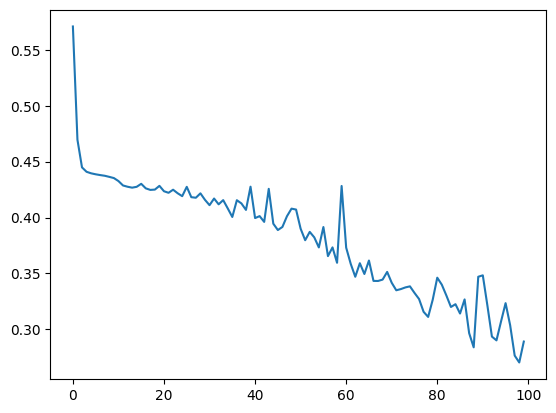

In [99]:
sns.lineplot(cost)

**Epoch 1000: loss: 0.0905 Train Acc: 99.61% | Dev Acc: 85.52% | Test Acc: 85.00%**

#### Accuracy : 85.00%

***With L2 Regularaization.***


___